In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



In [2]:
df= pd.read_csv("only_variable_with_corr_name_season_added.csv")

In [3]:
df

,Latitude,Longitude,Time,Albedo,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Wind_Gust,Planetary_Boundary_Layer_Height,Latent_Heat_Flux,Pressure,...,Cosine_of_Month,weekday,oct_feb,march_may,june_sep,nov_feb,june_aug,sep_oct,nov_march,april_may
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,0.866025,1,1,0,0,1,0,0,1,0
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,0.866025,1,1,0,0,1,0,0,1,0
2,22.630,88.352,2021-01-03,5.93766,322.803813,195.740000,2.774223,262.226417,28.723234,101257.671000,...,0.866025,0,1,0,0,1,0,0,1,0
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,0.866025,1,1,0,0,1,0,0,1,0
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,0.866025,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,22.545,88.340,2023-08-27,11.06430,447.360698,218.351436,4.011113,509.447365,121.838930,100109.151406,...,-0.500000,0,0,0,1,0,1,0,0,0
9726,22.545,88.340,2023-08-28,11.38305,446.798837,254.572562,3.222736,348.428543,132.334216,100105.622344,...,-0.500000,1,0,0,1,0,1,0,0,0
9727,22.545,88.340,2023-08-29,11.53260,449.412098,170.017404,2.810299,586.165287,94.150990,100182.874219,...,-0.500000,1,0,0,1,0,1,0,0,0
9728,22.545,88.340,2023-08-30,11.89660,444.362351,238.533522,2.842451,508.752148,110.109848,100287.627813,...,-0.500000,1,0,0,1,0,1,0,0,0


In [4]:
nan_count_per_column = df.isna().sum()

print("Number of NaN values in each column:")
print(nan_count_per_column)

Number of NaN values in each column:
Latitude                             0
Longitude                            0
Time                                 0
Albedo                               0
Downward_Long-Wave_Rad_Flux          0
Downward_Short-Wave_Rad_Flux         0
Wind_Gust                            0
Planetary_Boundary_Layer_Height      0
Latent_Heat_Flux                     0
Pressure                             0
R_H_L103                             0
SHTFL_L1_Avg_1                       0
TMP_L103                             0
U_GRD_L103                           0
ULWRF_L1_Avg_1                       0
USWRF_L1_Avg_1                       0
Vertical_motion                      0
Visibility                           0
Station Name                         0
PM 2.5                             225
AOD                                  0
Precipitation_Rate                   0
Sine_of_Month                        0
Cosine_of_Month                      0
weekday                    

In [5]:
# Forward fill
#df['AOD'] = df['AOD'].fillna(method='ffill')

# Backward fill
#df['AOD'] = df['AOD'].fillna(method='bfill')
import pandas as pd

# Assuming df is your DataFrame
#df['AOD'] = df['AOD'].ffill()
#df['PM 2.5'] = df['PM 2.5'].ffill()

# Or, if you want to use backward filling (bfill) instead:
# df['AOD'] = df['AOD'].bfill()



In [6]:
nan_count_per_column = df.isna().sum()

print("Number of NaN values in each column:")
print(nan_count_per_column)

Number of NaN values in each column:
Latitude                             0
Longitude                            0
Time                                 0
Albedo                               0
Downward_Long-Wave_Rad_Flux          0
Downward_Short-Wave_Rad_Flux         0
Wind_Gust                            0
Planetary_Boundary_Layer_Height      0
Latent_Heat_Flux                     0
Pressure                             0
R_H_L103                             0
SHTFL_L1_Avg_1                       0
TMP_L103                             0
U_GRD_L103                           0
ULWRF_L1_Avg_1                       0
USWRF_L1_Avg_1                       0
Vertical_motion                      0
Visibility                           0
Station Name                         0
PM 2.5                             225
AOD                                  0
Precipitation_Rate                   0
Sine_of_Month                        0
Cosine_of_Month                      0
weekday                    

In [7]:
df['Time'] = pd.to_datetime(df['Time'])

In [8]:

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'Time' column is in dateTime format
df['Time'] = pd.to_datetime(df['Time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2021-01-01'
date_range_end = '2022-11-30'
date_mask = (df['Time'] >= date_range_start) & (df['Time'] <= date_range_end)
filtered_data = df[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 200)
final_filtered_data = filtered_data[pm_mask]

# Create a new DataFrame with the filtered data
new_df = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df)


      Latitude  Longitude       Time   Albedo  Downward_Long-Wave_Rad_Flux  \
0       22.630     88.352 2021-01-01  5.98142                   312.559000   
1       22.630     88.352 2021-01-02  5.97004                   313.683534   
3       22.630     88.352 2021-01-04  5.91420                   333.227000   
4       22.630     88.352 2021-01-05  5.89578                   342.897000   
5       22.630     88.352 2021-01-06  5.86226                   355.172000   
...        ...        ...        ...      ...                          ...   
9451    22.545     88.340 2022-11-26  5.68390                   333.394346   
9452    22.545     88.340 2022-11-27  5.68290                   334.095646   
9453    22.545     88.340 2022-11-28  5.64940                   341.222578   
9454    22.545     88.340 2022-11-29  5.54430                   368.164877   
9455    22.545     88.340 2022-11-30  7.29460                   372.581345   

      Downward_Short-Wave_Rad_Flux  Wind_Gust  \
0             

In [8]:
new_df = new_df.drop(['Station Name'], axis=1)

In [9]:
# Remove rows with NaN values
new_df= new_df.dropna()

In [10]:
new_df

,Latitude,Longitude,Time,Albedo,Downward_Long-Wave_Rad_Flux,Downward_Short-Wave_Rad_Flux,Wind_Gust,Planetary_Boundary_Layer_Height,Latent_Heat_Flux,Pressure,...,Cosine_of_Month,weekday,oct_feb,march_may,june_sep,nov_feb,june_aug,sep_oct,nov_march,april_may
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,0.866025,1,1,0,0,1,0,0,1,0
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,0.866025,1,1,0,0,1,0,0,1,0
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,0.866025,1,1,0,0,1,0,0,1,0
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,0.866025,1,1,0,0,1,0,0,1,0
5,22.630,88.352,2021-01-06,5.86226,355.172000,198.774000,2.081998,263.980614,28.888099,101035.096312,...,0.866025,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,22.545,88.340,2022-11-26,5.68390,333.394346,212.752595,3.006576,353.161592,44.043686,101004.312656,...,0.866025,1,1,0,0,1,0,0,1,0
9452,22.545,88.340,2022-11-27,5.68290,334.095646,211.610745,2.565543,406.359686,41.616214,100886.430156,...,0.866025,0,1,0,0,1,0,0,1,0
9453,22.545,88.340,2022-11-28,5.64940,341.222578,208.738902,2.989004,378.695635,41.007530,101021.260469,...,0.866025,1,1,0,0,1,0,0,1,0
9454,22.545,88.340,2022-11-29,5.54430,368.164877,199.690645,3.528009,367.272639,42.218011,101125.302344,...,0.866025,1,1,0,0,1,0,0,1,0


In [11]:
# high_pm= df[df['PM 2.5']>30]

In [12]:
# high_pm

In [13]:
# Assuming your DataFrame is named 'df'
X = new_df.drop(['PM 2.5',"Time"], axis=1)  # Features (excluding the target variable)
y = new_df['PM 2.5']  # Target variable


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
#print(X_test.dtypes)

In [16]:

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)




ValueError: could not convert string to float: 'Rabindra Bharati University'

In [17]:
from sklearn.model_selection import cross_val_score


# Assuming rf_model is your Random Forest model
cross_val_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cross_val = np.sqrt(-cross_val_scores.mean())

print(f'Cross-Validated RMSE: {rmse_cross_val:.4f}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Rabindra Bharati University'


In [16]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


Downward_Long-Wave_Rad_Flux        0.442910
Latitude                           0.118039
Latent_Heat_Flux                   0.093282
R_H_L103                           0.054905
Vertical_motion                    0.041567
AOD                                0.040531
Wind_Gust                          0.033382
Albedo                             0.032201
Planetary_Boundary_Layer_Height    0.017023
SHTFL_L1_Avg_1                     0.016138
Pressure                           0.015315
Longitude                          0.015273
U_GRD_L103                         0.014351
TMP_L103                           0.013714
Downward_Short-Wave_Rad_Flux       0.012415
USWRF_L1_Avg_1                     0.011565
Visibility                         0.011190
ULWRF_L1_Avg_1                     0.009639
Precipitation_Rate                 0.002390
Cosine_of_Month                    0.001293
weekday                            0.001249
Sine_of_Month                      0.001083
oct_feb                         

In [17]:
from sklearn.metrics import mean_squared_error, r2_score


# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate RMSE for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')



Training RMSE: 5.8038
Testing RMSE: 16.0855
Training R-squared: 0.9759
Testing R-squared: 0.8092


In [19]:
import joblib

# Save the model to a file
model_filename = 'random_forest_model_27_12_2nd.pkl'
joblib.dump(rf_model, model_filename)



['random_forest_model_27_12_2nd.pkl']

ready unseen data

In [20]:
df1= pd.read_csv("only_variable_with_corr_name_season_added.csv")

In [21]:
# df['Time'] = pd.to_dateTime(df['Time'])

In [22]:
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'Time' column is in dateTime format
df1['Time'] = pd.to_datetime(df1['Time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2022-12-01'
date_range_end = '2022-12-31'
date_mask = (df1['Time'] >= date_range_start) & (df1['Time'] <= date_range_end)
filtered_data = df1[date_mask]

# Further filter based on 'PM 2.5' range
#pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 250)
final_filtered_data = filtered_data

# Create a new DataFrame with the filtered data
new_df1 = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df1)



      Latitude  Longitude       Time   Albedo  Downward_Long-Wave_Rad_Flux  \
699     22.630     88.352 2022-12-01  5.75860                   344.459501   
700     22.630     88.352 2022-12-02  5.84628                   323.396785   
701     22.630     88.352 2022-12-03  5.87226                   313.220635   
702     22.630     88.352 2022-12-04  5.90080                   310.218880   
703     22.630     88.352 2022-12-05  5.91238                   312.582410   
...        ...        ...        ...      ...                          ...   
9482    22.545     88.340 2022-12-27  5.61565                   361.617300   
9483    22.545     88.340 2022-12-28  5.65195                   337.161187   
9484    22.545     88.340 2022-12-29  5.74805                   307.254359   
9485    22.545     88.340 2022-12-30  5.71075                   314.481768   
9486    22.545     88.340 2022-12-31  5.71550                   322.851497   

      Downward_Short-Wave_Rad_Flux  Wind_Gust  \
699           

In [23]:
new_df1= new_df1.dropna()

In [24]:
X_unseen = new_df1.drop(['PM 2.5','Station Name',"Time"], axis=1)  # Features (excluding the target variable)

In [25]:
# Later, when you want to use the model for predictions on unseen data:
# Load the model from the file
import joblib
loaded_model = joblib.load(model_filename)

#Make predictions on unseen data (replace X_unseen with your actual unseen data)
y_unseen_pred = loaded_model.predict(X_unseen)

#Display the predictions on unseen data
print(y_unseen_pred)
pm=(new_df1["PM 2.5"])
print(pm)


[ 81.75490613 103.94330373 102.05413081 102.30704154 111.91528827
 107.15990707 114.24714089  96.05317559 103.33447634  91.55040665
 105.07920651 108.00090469 101.71699167 113.57388646  94.8263077
  88.94492642 108.62485883 104.61209417 114.21543789 113.12505434
 108.49383678 109.14695549  92.79794456 108.87448079  99.33921248
 106.87117243 107.02409261 106.6598317   96.88161025 115.16742847
 120.46328617 134.39479595 154.25896274 154.13205922 157.31770246
 157.48032439 152.6063987  159.27741848 157.83610946 148.88657279
 146.87821915 155.80438473 158.58489853 158.43721753 153.89945761
 150.76851842 147.99807196 154.33917955 155.4853699  150.63072514
 159.83697681 153.7020783  158.64919831 155.71327415 165.57898752
 128.81457291 142.72528852 134.81423711 149.84605854 155.57547342
 161.68588165 166.69565456  81.23675375  90.1252194   98.75916937
  98.03869712  96.35152018  93.73840871 115.41163719 123.87980495
 108.46950381  92.5460056  128.27350802 123.88410278 116.19642179
 117.370961

In [26]:
rmse = np.sqrt(mean_squared_error(y_unseen_pred, pm))

In [27]:
rmse

35.42850175822831

In [28]:
r2_unseen = r2_score(y_unseen_pred, pm)

In [29]:
r2_unseen

-1.6929719488073887

In [30]:
import numpy as np

# Assuming y_unseen_pred and pm_actual are your predicted and actual PM 2.5 values
correlation_coefficient = np.corrcoef(y_unseen_pred, pm)[0, 1]

print(f'Correlation coefficient between predicted and actual PM 2.5: {correlation_coefficient:.4f}')


Correlation coefficient between predicted and actual PM 2.5: 0.5237


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_actual and y_pred are your actual and predicted values
y_actual_tttt = np.array([pm])  # Replace with your actual values
y_pred_tttt = np.array([y_unseen_pred])  # Replace with your predicted values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_tttt, y_pred_tttt))

# Calculate the mean of the target variable
mean_target = np.mean(y_actual_tttt)

# Compare RMSE with Mean
print(f'RMSE: {rmse:.4f}')
print(f'Mean of the Target Variable: {mean_target:.4f}')

# Normalize RMSE by dividing by the mean
nrmse = rmse / mean_target
print(f'Normalized RMSE (NRMSE): {nrmse:.4f}')


RMSE: 35.4285
Mean of the Target Variable: 122.0505
Normalized RMSE (NRMSE): 0.2903


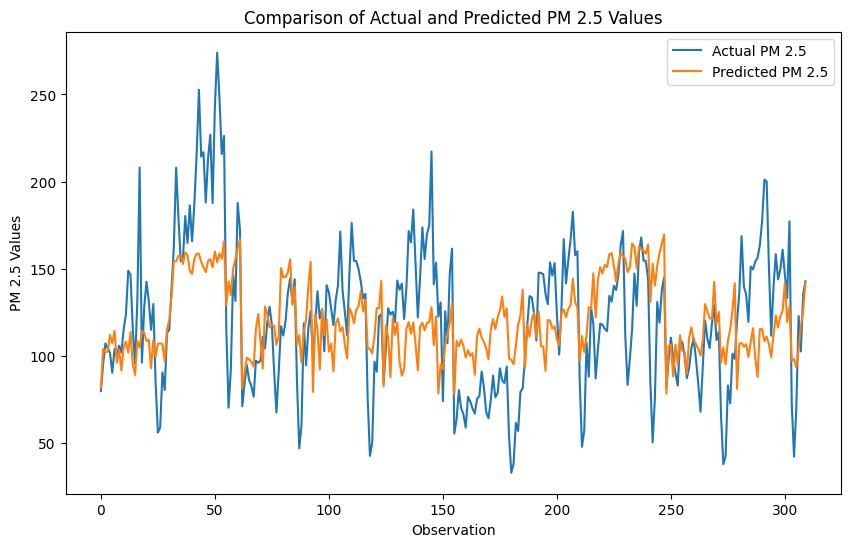

In [32]:
import matplotlib.pyplot as plt


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_actual_tttt.flatten(), label='Actual PM 2.5')
plt.plot(y_pred_tttt.flatten(), label='Predicted PM 2.5')

# Add labels and title
plt.xlabel('Observation')
plt.ylabel('PM 2.5 Values')
plt.title('Comparison of Actual and Predicted PM 2.5 Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [33]:
data = {'y_actual': y_actual_tttt.flatten(), 'y_pred': y_pred_tttt.flatten()}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('unseen_predict_2nd.csv', index=False)